# Project Data Analyst - Prediksi harga mobil bekas Ford
Sebuah project data analyst untuk melakukan analisa harga mobil bekas Ford berdasarkan dataset yang sudah ada, serta mengetahui apa saja feature atau kolom yang mempengaruhi harga mobil bekas Ford.

## DataSet
Dataset harga mobil bekas ford saya ambil secara gratis melalui Kaggle (https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction?resource=download). Penjelasan terkait definisi tiap feature/kolom adalah sebagai berikut :
- model -> Ford Car Brands
- year -> Production Year
- price -> Price of car in $
- transmission -> Automatic,Manual, Semi-Auto
- mileage -> Number of miles traveled
- fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other
- tax -> Annual Tax
- mpg -> Miles per Gallon
- engineSize -> Car's Engine Size

NB : Untuk kolom price, saya asumsikan disini sebagai harga mobil bekas dengan currency $.

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


##Rekomendasi model yang nantinya akan dieksekusi
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [118]:
df = pd.read_csv('C:\\Users\\muh.muhaimin nur\\Downloads\\ford-data analyst\\ford.csv')
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [120]:
df.shape

(17966, 9)

# Missing Values

In [121]:
df.isna().sum().sort_values(ascending=False)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Duplicated

In [122]:
df.duplicated().sum()

154

In [123]:
df_clean = df.drop_duplicates().reset_index(drop=True)

In [124]:
df_clean.duplicated().sum()

0

In [125]:
df_clean.isna().sum().sort_values(ascending=False)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Outliers

In [126]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17812 entries, 0 to 17811
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [127]:
df_clean_to_plot = df_clean.select_dtypes(include=['float','int'])
numeric = df_clean_to_plot.columns
numeric

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [128]:
df_clean_to_plot

year  price  mileage  tax   mpg  engineSize
0      2017  12000    15944  150  57.7         1.0
1      2018  14000     9083  150  57.7         1.0
2      2017  13000    12456  150  57.7         1.0
3      2019  17500    10460  145  40.3         1.5
4      2019  16500     1482  145  48.7         1.0
...     ...    ...      ...  ...   ...         ...
17807  2017   8999    16700  150  47.1         1.4
17808  2014   7499    40700   30  57.7         1.0
17809  2015   9999     7010   20  67.3         1.6
17810  2018   8299     5007  145  57.7         1.2
17811  2015   8299     5007   22  57.7         1.0

[17812 rows x 6 columns]

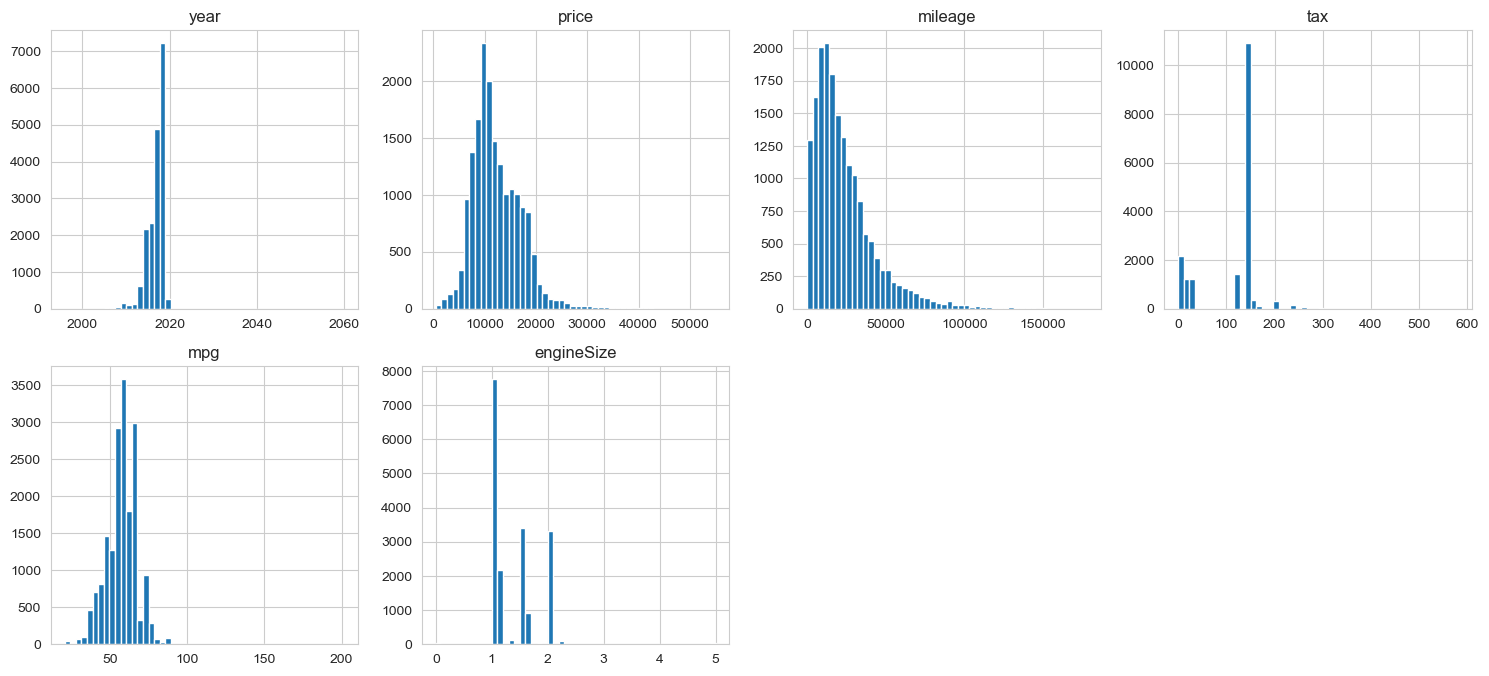

In [129]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(3,4), column=numeric)
plt.tight_layout()
plt.show()

In [130]:
df_clean.shape

(17812, 9)

In [131]:
df.shape

(17966, 9)

In [132]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17812 entries, 0 to 17811
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


# Data Insight

In [133]:
df_clean['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [134]:
insight=df_clean.groupby('model')['price'].sum().reset_index()
index_to_drop=23
insight=insight.drop(index_to_drop)
insight1=insight.sort_values(by='price',ascending=False)[['model','price']].head(10)
insight1
### Top 10 type mobil ford berdasarkan harga tertinggi

model     price
5      Fiesta  66332283
6       Focus  60030224
13       Kuga  34928705
2    EcoSport  14052864
14     Mondeo   6276581
1       C-MAX   5373119
18      S-MAX   5190688
3        Edge   4655584
12        Ka+   4549602
8      Galaxy   4051648

<Axes: xlabel='model', ylabel='price'>

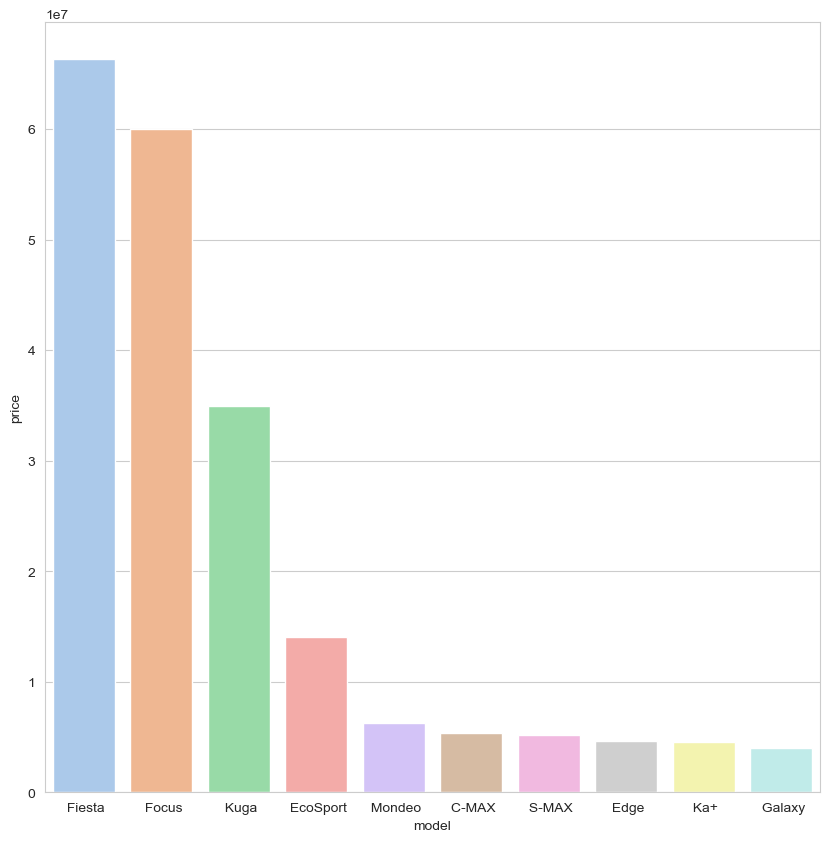

In [135]:
fig, ax=plt.subplots(figsize=(10,10))
sns.barplot(x='model', y='price', palette="pastel", data=insight1, ax=ax)

In [136]:
df_clean['year'].unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060], dtype=int64)

In [21]:
lacak = df_clean[df_clean['year'] == 2060]
print(lacak)

         model  year  price transmission  mileage fuelType  tax   mpg  \
17572   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

       engineSize  
17572         1.4  


In [22]:
df_clean.drop(df_clean[df_clean['year'] == 2060].index, inplace=True)

In [23]:
df_clean['year'].unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000],
      dtype=int64)

In [24]:
insight_b=df_clean.groupby('year')['price'].sum().reset_index()
insight2=insight_b.sort_values(by='year')
insight2

year     price
0   1996      3000
1   1998      2699
2   2000      1995
3   2002      5785
4   2003      6189
5   2004      5744
6   2005     25488
7   2006     28634
8   2007     83314
9   2008    146342
10  2009    338495
11  2010    271903
12  2011    472113
13  2012    653307
14  2013   4061935
15  2014   6021380
16  2015  11908049
17  2016  24677121
18  2017  58082890
19  2018  52355498
20  2019  54139409
21  2020   5247552

In [25]:
insight_c = df_clean.groupby('transmission')['price'].sum().reset_index()
insight3 = insight_c.sort_values(by='price')
insight3

transmission      price
2    Semi-Auto   16015323
0    Automatic   21256037
1       Manual  181267482

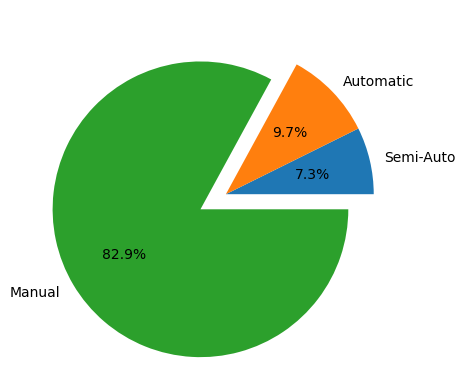

In [26]:
y = insight3['price']
labels = ['Semi-Auto', 'Automatic', 'Manual']
myexplode = [0,0,0.2]
plt.pie(y, labels=labels, explode=myexplode, autopct='%1.1f%%')
plt.show()

In [27]:
df_clean.drop(df_clean[df_clean['fuelType'] == "Other"].index, inplace=True)

In [28]:
df_clean['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric'], dtype=object)

In [ ]:
rows_with_bob = df_clean[(df_clean['model'] == " Mondeo") & (df_clean['year'] == 2015) & (df_clean['transmission'] == "Automatic")]
print(rows_with_bob)

         model  year  price transmission  mileage fuelType  tax   mpg  \
3583    Mondeo  2015  12812    Automatic    34241   Petrol  200  43.5   
7563    Mondeo  2015  14991    Automatic    28996   Petrol  240  38.2   
13878   Mondeo  2015  10490    Automatic    54000   Diesel  125  58.9   
13994   Mondeo  2015  12999    Automatic    51438   Petrol  235  38.2   
14546   Mondeo  2015  11999    Automatic    55686   Hybrid    0  67.3   
14749   Mondeo  2015   9795    Automatic   102940   Hybrid    0  67.3   
15113   Mondeo  2015  11000    Automatic    47932   Diesel  125  58.9   
15930   Mondeo  2015   9899    Automatic    54349   Diesel  125  58.9   
16441   Mondeo  2015   9299    Automatic    78798   Diesel  125  57.7   
16860   Mondeo  2015   8000    Automatic   109880   Diesel  125  58.9   
16924   Mondeo  2015   8990    Automatic    82000   Diesel  125  58.9   

       engineSize  
3583          1.5  
7563          2.0  
13878         2.0  
13994         2.0  
14546         2.0  
147

In [ ]:
df_clean['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [ ]:
df_clean.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0

In [ ]:
df_clean['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [ ]:
## Menghapus spasi dari setiap nilai yang ada di kolom model
df_clean['model'] = df_clean['model'].str.strip()

In [ ]:
df_clean['model'].unique()

array(['Fiesta', 'Focus', 'Puma', 'Kuga', 'EcoSport', 'C-MAX', 'Mondeo',
       'Ka+', 'Tourneo Custom', 'S-MAX', 'B-MAX', 'Edge',
       'Tourneo Connect', 'Grand C-MAX', 'KA', 'Galaxy', 'Mustang',
       'Grand Tourneo Connect', 'Fusion', 'Ranger', 'Streetka', 'Escort',
       'Transit Tourneo'], dtype=object)

In [ ]:
df_clean.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
insight_d = df_clean.groupby('fuelType')['tax'].sum().reset_index()
insight4 = insight_d.sort_values(by='tax')
insight4

fuelType      tax
1  Electric        0
2    Hybrid     2215
0    Diesel   580305
3    Petrol  1435642

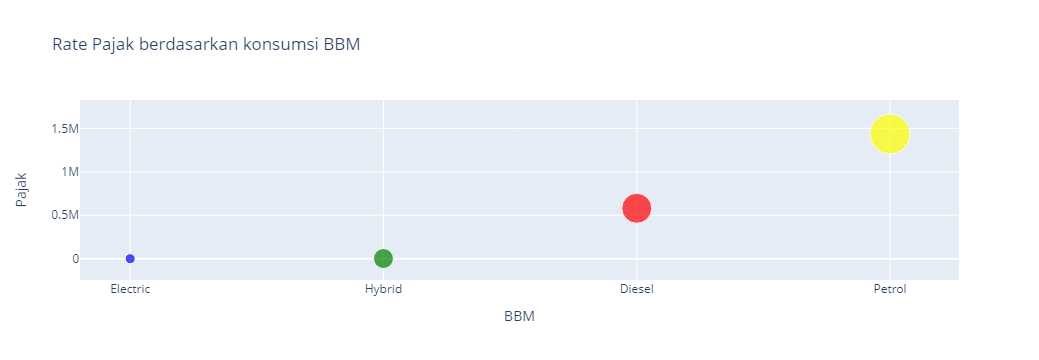

In [ ]:
nilai_x = insight4['fuelType']
nilai_y = insight4['tax']
bubble_size = [10,20,30,40,50]
bubble_color = ['blue', 'green', 'red', 'yellow', 'purple']
scatter_plot = go.Scatter(x=nilai_x, y=nilai_y, mode='markers', marker=dict(size=bubble_size, color=bubble_color))
fig = go.Figure(scatter_plot)
fig.update_layout(
    title = 'Rate Pajak berdasarkan konsumsi BBM',
    xaxis_title = 'BBM',
    yaxis_title = 'Pajak'
    )
fig.show()

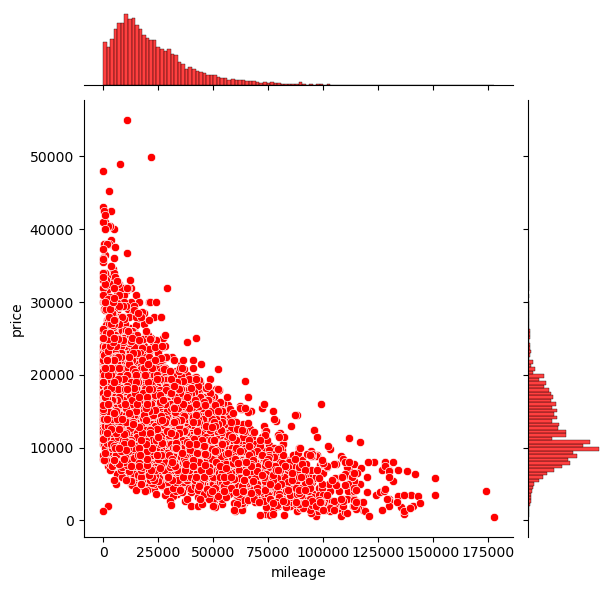

In [ ]:
sns.jointplot(x=df_clean['mileage'], y=df_clean['price'], data=df_clean, ax=ax, color="red")

In [ ]:
df_clean.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0  Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1   Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2   Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3  Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4  Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0

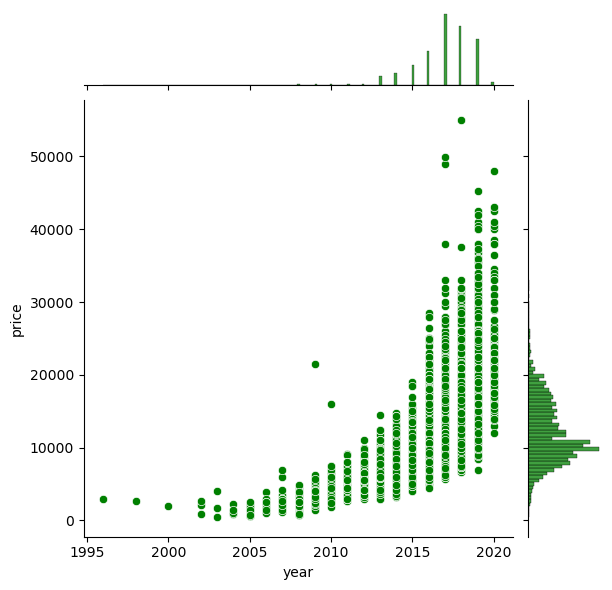

In [ ]:
sns.jointplot(x=df_clean['year'], y=df_clean['price'], data=df_clean, ax=ax, color="green")

In [ ]:
import datetime
date_time = datetime.datetime.now()

In [ ]:
df_clean['Usia_Mobil'] = date_time.year - df_clean['year'] ##dalam tahun

In [ ]:
df_clean.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0  Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0   
1   Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0   
2   Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0   
3  Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5   
4  Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0   

   Usia_Mobil  
0           6  
1           5  
2           6  
3           4  
4           4

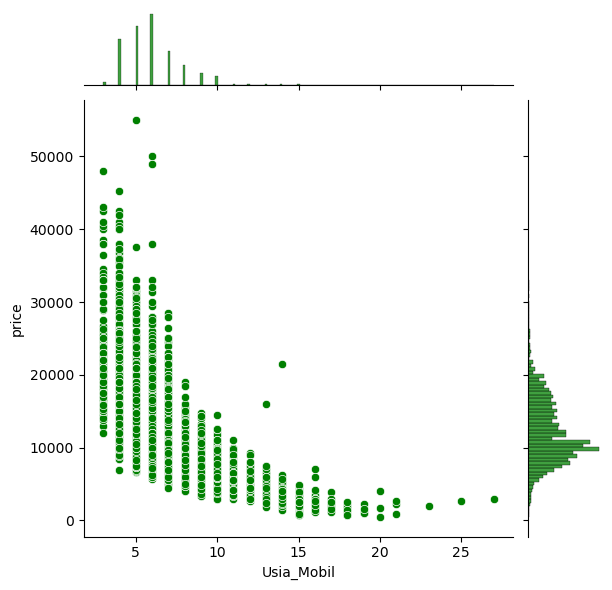

In [ ]:
sns.jointplot(x=df_clean['Usia_Mobil'], y=df_clean['price'], data=df_clean, ax=ax, color="green")

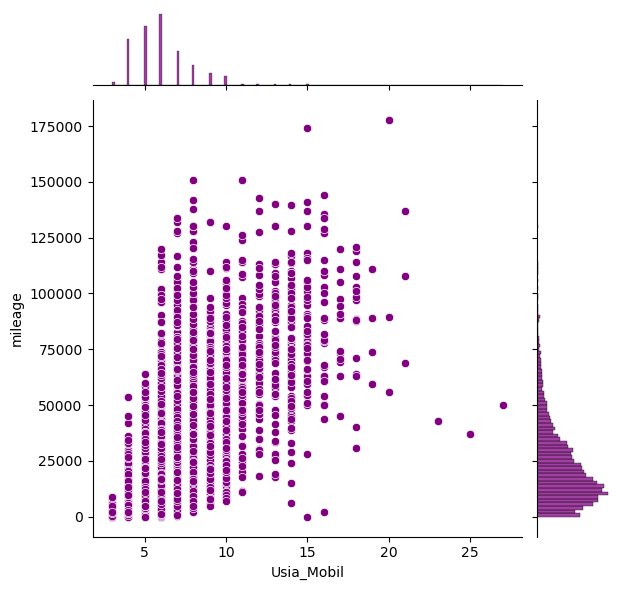

In [ ]:
sns.jointplot(x=df_clean['Usia_Mobil'], y=df_clean['mileage'], data=df_clean, ax=ax, color="purple")

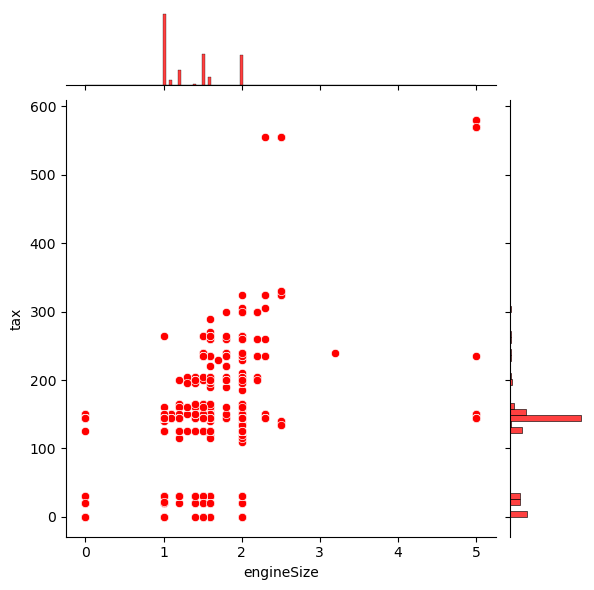

In [ ]:
sns.jointplot(x=df_clean['engineSize'], y=df_clean['tax'], data=df_clean, ax=ax, color="red")

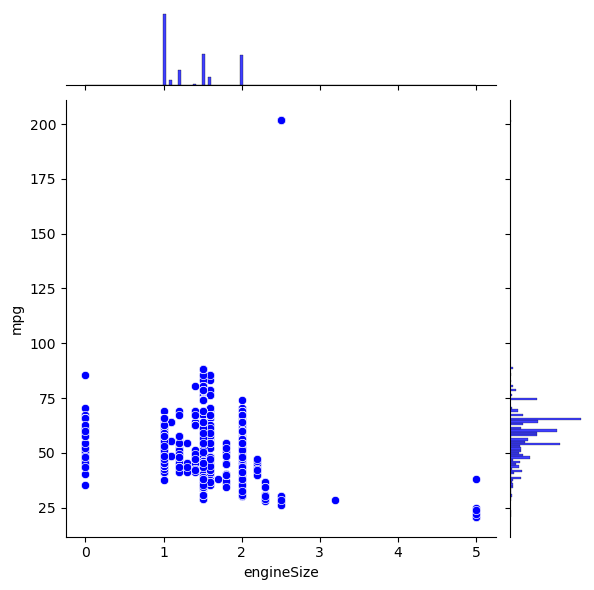

In [ ]:
sns.jointplot(x=df_clean['engineSize'], y=df_clean['mpg'], data=df_clean, ax=ax, color="blue")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Kolom yang akan di-encode
columns_to_encode = ['model', 'transmission', 'fuelType']

# Membuat instance OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit dan transform data
encoded = encoder.fit_transform(df_clean[columns_to_encode])

# Membuat DataFrame baru untuk hasil encoding
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(input_features=columns_to_encode))

# Menggabungkan hasil encoding dengan data lainnya
df_clean_encoded = pd.concat([df_clean.drop(columns=columns_to_encode), encoded_df], axis=1)

pd.set_option('display.max_columns', None)
df_clean_encoded.head()

year    price  mileage    tax   mpg  engineSize  Usia_Mobil  model_B-MAX  \
0  2017.0  12000.0  15944.0  150.0  57.7         1.0         6.0          0.0   
1  2018.0  14000.0   9083.0  150.0  57.7         1.0         5.0          0.0   
2  2017.0  13000.0  12456.0  150.0  57.7         1.0         6.0          0.0   
3  2019.0  17500.0  10460.0  145.0  40.3         1.5         4.0          0.0   
4  2019.0  16500.0   1482.0  145.0  48.7         1.0         4.0          0.0   

   model_C-MAX  model_EcoSport  model_Edge  model_Escort  model_Fiesta  \
0          0.0             0.0         0.0           0.0           1.0   
1          0.0             0.0         0.0           0.0           0.0   
2          0.0             0.0         0.0           0.0           0.0   
3          0.0             0.0         0.0           0.0           1.0   
4          0.0             0.0         0.0           0.0           1.0   

   model_Focus  model_Fusion  model_Galaxy  model_Grand C-MAX  \
0          0.0           0.0           0.0                0.0   
1          1.0           0.0           0.0                0.0   
2          1.0           0.0           0.0                0.0   
3          0.0           0.0           0.0                0.0   
4          0.0           0.0           0.0                0.0   

   model_Grand Tourneo Connect  model_KA  model_Ka+  model_Kuga  model_Mondeo  \
0                          0.0       0.0        0.0         0.0           0.0   
1                          0.0       0.0        0.0         0.0           0.0   
2                          0.0       0.0        0.0         0.0           0.0   
3                          0.0       0.0        0.0         0.0           0.0   
4                          0.0       0.0        0.0         0.0           0.0   

   model_Mustang  model_Puma  model_Ranger  model_S-MAX  model_Streetka  \
0            0.0         0.0           0.0          0.0             0.0   
1            0.0         0.0           0.0          0.0             0.0   
2            0.0         0.0           0.0          0.0             0.0   
3            0.0         0.0           0.0          0.0             0.0   
4            0.0         0.0           0.0          0.0             0.0   

   model_Tourneo Connect  model_Tourneo Custom  model_Transit Tourneo  \
0                    0.0                   0.0                    0.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   0.0                    0.0   
3                    0.0                   0.0                    0.0   
4                    0.0                   0.0                    0.0   

   transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
0                     1.0                  0.0                     0.0   
1                     0.0                  1.0                     0.0   
2                     0.0                  1.0                     0.0   
3                     0.0                  1.0                     0.0   
4                     1.0                  0.0                     0.0   

   fuelType_Diesel  fuelType_Electric  fuelType_Hybrid  fuelType_Petrol  
0              0.0                0.0              0.0              1.0  
1              0.0                0.0              0.0              1.0  
2              0.0                0.0              0.0              1.0  
3              0.0                0.0              0.0              1.0  
4              0.0                0.0              0.0              1.0

<Axes: xlabel='fuelType', ylabel='transmission'>

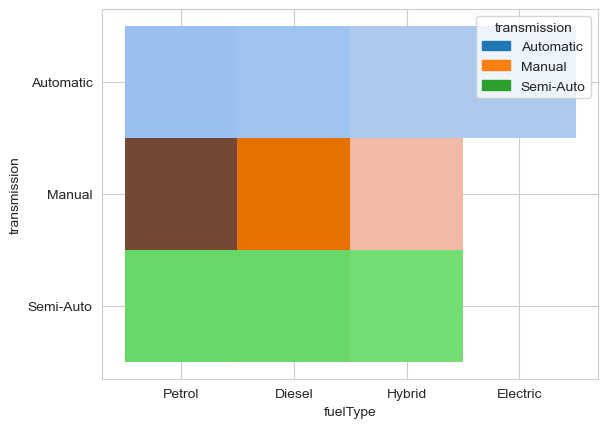

In [100]:
sns.histplot(data=df_clean, x='fuelType', y='transmission', hue='transmission', multiple='stack', kde=True)

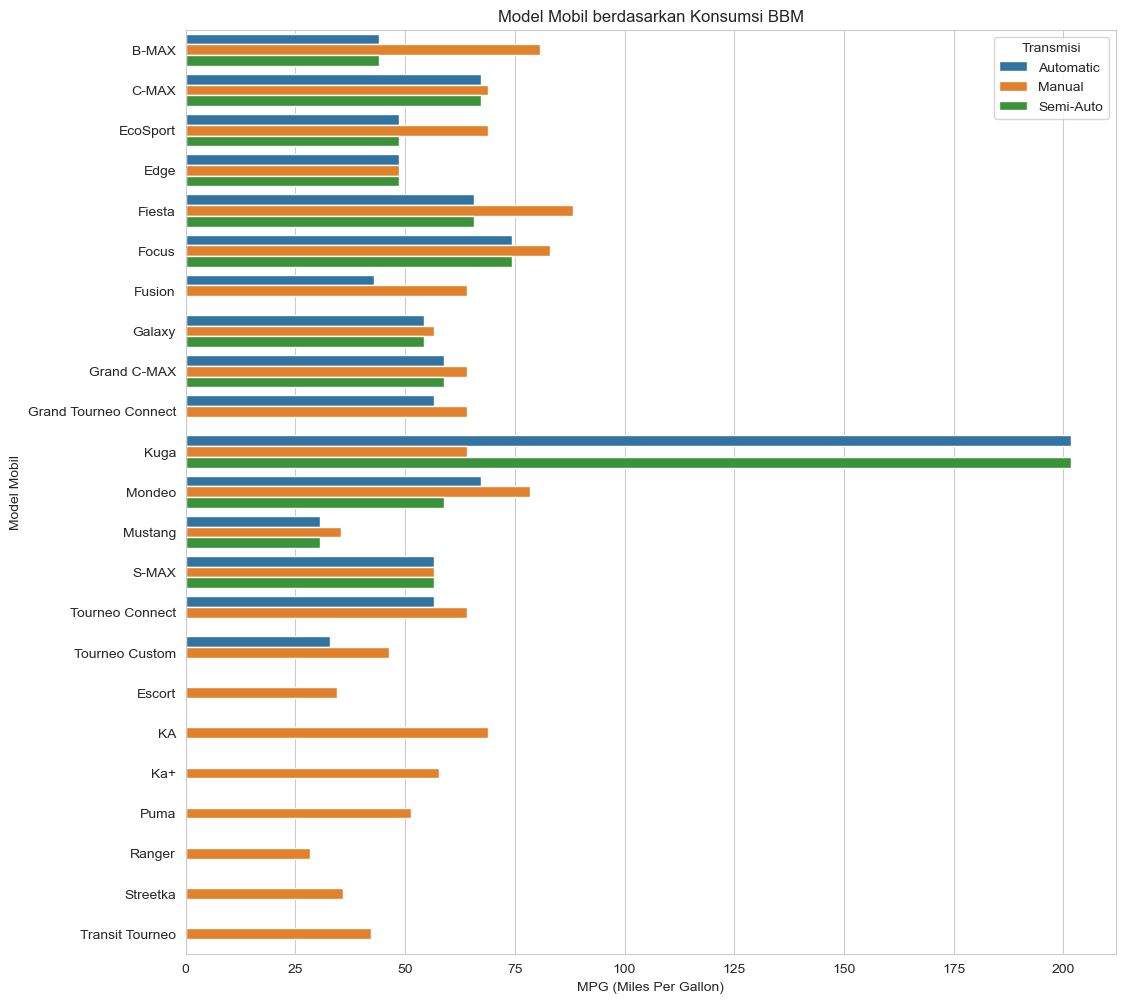

In [88]:
# Mengelompokkan dan mendapatkan 10 model dengan mpg tertinggi berdasarkan transmisinya
mobil_irit = df_clean.groupby(['transmission', 'model'])['mpg'].max().reset_index()

# Membuat bar plot
plt.figure(figsize=(12, 12))
sns.barplot(x='mpg', y='model', hue='transmission', data=mobil_irit)
plt.title('Model Mobil berdasarkan Konsumsi BBM')
plt.xlabel('MPG (Miles Per Gallon)')
plt.ylabel('Model Mobil')
plt.legend(title='Transmisi')
plt.show()

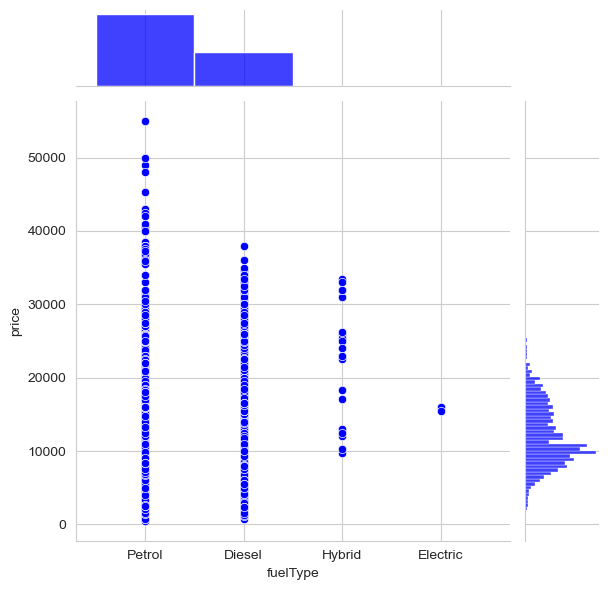

In [89]:
sns.jointplot(x=df_clean['fuelType'], y=df_clean['price'], data=df_clean, ax=ax, color="blue")

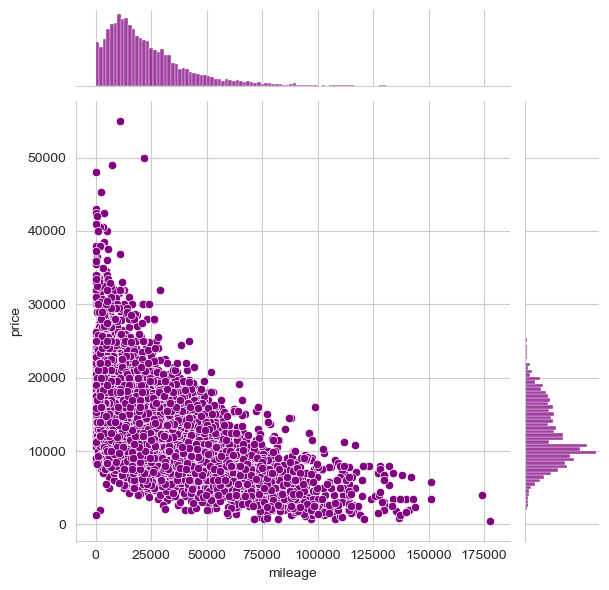

In [92]:
sns.jointplot(data=df_clean, x=df_clean['mileage'], y=df_clean['price'],color='purple')

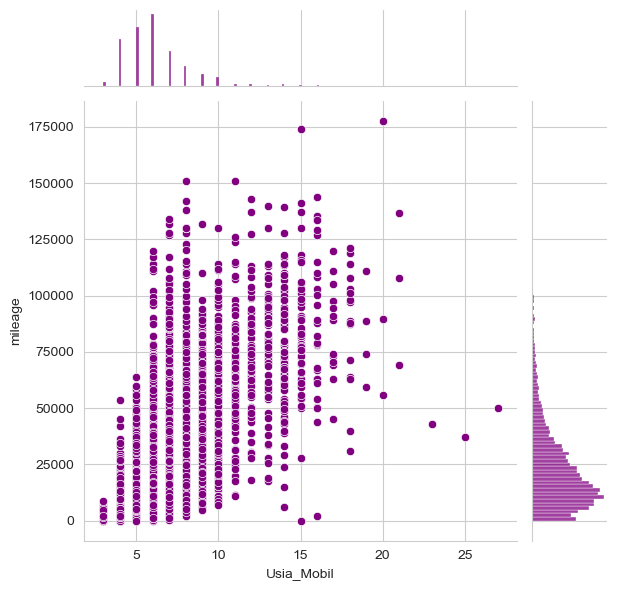

In [95]:
sns.jointplot(x=df_clean['Usia_Mobil'], y=df_clean['mileage'], data=df_clean, ax=ax, color="purple")

<Axes: >

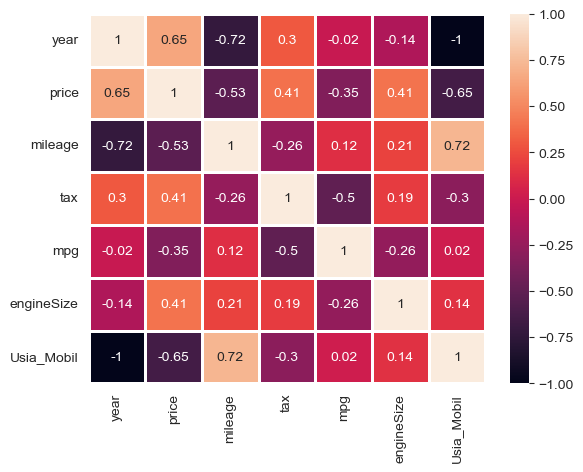

In [104]:
sns.heatmap(df_clean.corr(),annot=True,linewidths=1)

# Modelling

## Data Splitting
- Data Train = 60%
- Data Valid = 20%
- Data test = 20%

In [112]:
df.shape

(17966, 9)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [116]:
df_train.shape, df_valid.shape, df_test.shape

((10779, 9), (3593, 9), (3594, 9))

In [144]:
df_train.duplicated().sum()

65

In [146]:
df_valid.duplicated().sum()

5

In [147]:
df_test.duplicated().sum()

3

In [149]:
df_train = df.drop_duplicates().reset_index(drop=True)
df_valid = df.drop_duplicates().reset_index(drop=True)
df_test = df.drop_duplicates().reset_index(drop=True)

In [150]:
df_train.duplicated().sum()

0

In [151]:
df_valid.duplicated().sum()

0

In [152]:
df_test.duplicated().sum()

0

In [153]:
df_test['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [155]:
df_train['model'] = df_test['model'].str.strip()
df_valid['model'] = df_valid['model'].str.strip()
df_test['model'] = df_test['model'].str.strip()

In [156]:
df_test['model'].unique()

array(['Fiesta', 'Focus', 'Puma', 'Kuga', 'EcoSport', 'C-MAX', 'Mondeo',
       'Ka+', 'Tourneo Custom', 'S-MAX', 'B-MAX', 'Edge',
       'Tourneo Connect', 'Grand C-MAX', 'KA', 'Galaxy', 'Mustang',
       'Grand Tourneo Connect', 'Fusion', 'Ranger', 'Streetka', 'Escort',
       'Transit Tourneo'], dtype=object)

In [157]:
import datetime
date_time = datetime.datetime.now()
df_train['Usia_Mobil'] = date_time.year - df_train['year'] ##dalam tahun
df_valid['Usia_Mobil'] = date_time.year - df_valid['year']
df_test['Usia_Mobil'] = date_time.year - df_test['year']

In [160]:
df_train.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0  Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0   
1   Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0   
2   Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0   
3  Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5   
4  Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0   

   Usia_Mobil  
0           6  
1           5  
2           6  
3           4  
4           4

In [161]:
from sklearn.preprocessing import OneHotEncoder

# Kolom yang akan di-encode
columns_to_encode = ['model', 'transmission', 'fuelType']

# Membuat instance OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit dan transform data pelatihan
encoded_train = encoder.fit_transform(df_train[columns_to_encode])
encoded_valid = encoder.transform(df_valid[columns_to_encode])
encoded_test = encoder.transform(df_test[columns_to_encode])

# Membuat DataFrame baru untuk hasil encoding
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(input_features=columns_to_encode))
encoded_valid_df = pd.DataFrame(encoded_valid, columns=encoder.get_feature_names_out(input_features=columns_to_encode))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(input_features=columns_to_encode))

# Menggabungkan hasil encoding dengan data lainnya
df_train_final_encoded = pd.concat([df_train.drop(columns=columns_to_encode), encoded_train_df], axis=1)
df_valid_final_encoded = pd.concat([df_valid.drop(columns=columns_to_encode), encoded_valid_df], axis=1)
df_test_final_encoded = pd.concat([df_test.drop(columns=columns_to_encode), encoded_test_df], axis=1)


df_train_final_encoded.head()

year  price  mileage  tax   mpg  engineSize  Usia_Mobil  model_B-MAX  \
0  2017  12000    15944  150  57.7         1.0           6          0.0   
1  2018  14000     9083  150  57.7         1.0           5          0.0   
2  2017  13000    12456  150  57.7         1.0           6          0.0   
3  2019  17500    10460  145  40.3         1.5           4          0.0   
4  2019  16500     1482  145  48.7         1.0           4          0.0   

   model_C-MAX  model_EcoSport  model_Edge  model_Escort  model_Fiesta  \
0          0.0             0.0         0.0           0.0           1.0   
1          0.0             0.0         0.0           0.0           0.0   
2          0.0             0.0         0.0           0.0           0.0   
3          0.0             0.0         0.0           0.0           1.0   
4          0.0             0.0         0.0           0.0           1.0   

   model_Focus  model_Fusion  model_Galaxy  model_Grand C-MAX  \
0          0.0           0.0           0.0                0.0   
1          1.0           0.0           0.0                0.0   
2          1.0           0.0           0.0                0.0   
3          0.0           0.0           0.0                0.0   
4          0.0           0.0           0.0                0.0   

   model_Grand Tourneo Connect  model_KA  model_Ka+  model_Kuga  model_Mondeo  \
0                          0.0       0.0        0.0         0.0           0.0   
1                          0.0       0.0        0.0         0.0           0.0   
2                          0.0       0.0        0.0         0.0           0.0   
3                          0.0       0.0        0.0         0.0           0.0   
4                          0.0       0.0        0.0         0.0           0.0   

   model_Mustang  model_Puma  model_Ranger  model_S-MAX  model_Streetka  \
0            0.0         0.0           0.0          0.0             0.0   
1            0.0         0.0           0.0          0.0             0.0   
2            0.0         0.0           0.0          0.0             0.0   
3            0.0         0.0           0.0          0.0             0.0   
4            0.0         0.0           0.0          0.0             0.0   

   model_Tourneo Connect  model_Tourneo Custom  model_Transit Tourneo  \
0                    0.0                   0.0                    0.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   0.0                    0.0   
3                    0.0                   0.0                    0.0   
4                    0.0                   0.0                    0.0   

   transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
0                     1.0                  0.0                     0.0   
1                     0.0                  1.0                     0.0   
2                     0.0                  1.0                     0.0   
3                     0.0                  1.0                     0.0   
4                     1.0                  0.0                     0.0   

   fuelType_Diesel  fuelType_Electric  fuelType_Hybrid  fuelType_Other  \
0              0.0                0.0              0.0             0.0   
1              0.0                0.0              0.0             0.0   
2              0.0                0.0              0.0             0.0   
3              0.0                0.0              0.0             0.0   
4              0.0                0.0              0.0             0.0   

   fuelType_Petrol  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

- X : variabel independent
- Y : variabel Dependent (Varibael target --> Price)

In [208]:
# Menghapus kolom harga dari data validasi dan mendefinisikan data target

X_train = df_train_final_encoded.drop(columns=['price'])
y_train = df_train_final_encoded['price']


X_valid = df_valid_final_encoded.drop(columns=['price'])
y_valid = df_valid_final_encoded['price']

X_test = df_test_final_encoded.drop(columns=['price'])
y_test = df_test_final_encoded['price']

In [209]:
y_test

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17807     8999
17808     7499
17809     9999
17810     8299
17811     8299
Name: price, Length: 17812, dtype: int64

## Ranking Skor (R2) Model Menggunakan Beberapa Matriks

### Linear Regression

In [210]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_valid)
y_pred

array([11150.6292166 , 14293.54166942, 13019.2010075 , ...,
       12463.29215686, 11282.38650476, 11530.62404484])

In [211]:
print("mean absolute error:",mean_absolute_error(y_valid,y_pred))
print("mean squared error:",mean_squared_error(y_valid,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_valid,y_pred)))
print("r2-score:",r2_score(y_valid,y_pred))

mean absolute error: 1365.946071909301
mean squared error: 3528621.3244764386
root mean squared error: 1878.4624895047648
r2-score: 0.8426909510685036


### Gradient Boost Regressor

In [212]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred2=gb.predict(X_valid)
y_pred2

array([10847.52350063, 13477.54249547, 11645.44639398, ...,
       10255.67205404,  9688.16660807, 10101.11142208])

In [213]:
print("mean absolute error:",mean_absolute_error(y_valid,y_pred2))
print("mean squared error:",mean_squared_error(y_valid,y_pred2))
print("root mean squared error:",np.sqrt(mean_squared_error(y_valid,y_pred2)))
print("R2 score:",r2_score(y_valid,y_pred2))

mean absolute error: 948.4268036502289
mean squared error: 1750083.6706042276
root mean squared error: 1322.9072796701316
R2 score: 0.9219797273616086


### Support Vector Regression (SVR)

In [214]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
y_pred3=svr.predict(X_valid)
y_pred3

array([11719.82748845, 12184.31797135, 11978.51364413, ...,
       12284.43253405, 12360.37547936, 12360.28414398])

In [215]:
print("mean absolute error:",mean_absolute_error(y_valid,y_pred3))
print("mean squared error:",mean_squared_error(y_valid,y_pred3))
print("root mean squared error:",np.sqrt(mean_squared_error(y_valid,y_pred3)))
print("R2 score:",r2_score(y_valid,y_pred3))

mean absolute error: 3245.6559769915316
mean squared error: 19672327.676205948
root mean squared error: 4435.349780592952
R2 score: 0.12299029211589285


### XG Boost Regression (XGB)

In [216]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred4=xgb.predict(X_valid)
y_pred4

array([11054.291, 13975.675, 11883.961, ..., 10030.917,  8414.137,
        9490.557], dtype=float32)

In [217]:
print("mean absolute error:",mean_absolute_error(y_valid,y_pred4))
print("mean squared error:",mean_squared_error(y_valid,y_pred4))
print("root mean squared error:",np.sqrt(mean_squared_error(y_valid,y_pred4)))
print("R2 score:",r2_score(y_valid,y_pred4))

mean absolute error: 672.0092448661388
mean squared error: 819611.8207296191
root mean squared error: 905.3241522955295
R2 score: 0.9634609825889665


### Random Forest Regression

In [218]:
#Random Forest
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred5=rf.predict(X_valid)
y_pred5

array([11594.26 , 13974.57 , 12902.9  , ...,  9861.64 ,  8728.685,
        8772.66 ])

In [219]:
print("mean absolute error:",mean_absolute_error(y_valid,y_pred5))
print("mean squared error:",mean_squared_error(y_valid,y_pred5))
print("root mean squared error:",np.sqrt(mean_squared_error(y_valid,y_pred5)))
print("R2 score:",r2_score(y_valid,y_pred5))

mean absolute error: 325.308132452618
mean squared error: 225523.19552100258
root mean squared error: 474.8928252995644
R2 score: 0.989945977157335


### Perbandingan prediksi harga dengan actual values

In [220]:
#Comparing Actual and predicted Values
Result=pd.DataFrame({'Actual Values':y_valid,'linear_Model':y_pred,'Random_Forest':y_pred1, 'SVR':y_pred3, 'Gradient_boost':y_pred2,'Xg_Boost':y_pred4})
Result

Actual Values  linear_Model  Random_Forest           SVR  \
0              12000  11150.629217       11384.03  11719.827488   
1              14000  14293.541669       13789.52  12184.317971   
2              13000  13019.201007       12873.19  11978.513644   
3              17500  15821.366955       17773.80  12106.315677   
4              16500  14916.581939       16473.91  12441.228580   
...              ...           ...            ...           ...   
17807           8999  11321.761792        8961.33  11658.962493   
17808           7499   4787.908395        7251.74   9826.341380   
17809           9999  12463.292157        9775.65  12284.432534   
17810           8299  11282.386505        8886.47  12360.375479   
17811           8299  11530.624045        8813.63  12360.284144   

       Gradient_boost      Xg_Boost  
0        10847.523501  11054.291016  
1        13477.542495  13975.674805  
2        11645.446394  11883.960938  
3        16911.313114  18053.945312  
4        16514.753648  16402.169922  
...               ...           ...  
17807     9842.522116   9096.024414  
17808     6652.761256   6864.288574  
17809    10255.672054  10030.916992  
17810     9688.166608   8414.136719  
17811    10101.111422   9490.556641  

[17812 rows x 6 columns]

Model Random Forest memiiki nilai R2 yang paling tinggi

### Performa Quality Check

In [221]:
X_full_train_final = pd.concat([X_train, X_valid])
y_full_train_final = pd.concat([y_train, y_valid])

In [222]:
#Random Forest
rf_final=RandomForestRegressor()
rf_final.fit(X_full_train_final,y_full_train_final)
y_prediksi=rf_final.predict(X_test)
y_prediksi

array([11707.87, 13938.44, 12973.96, ...,  9930.81,  8331.81,  8398.89])

In [223]:
print("mean absolute error:",mean_absolute_error(y_test,y_prediksi))
print("mean squared error:",mean_squared_error(y_test,y_prediksi))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_prediksi)))
print("R2 score:",r2_score(y_test,y_prediksi))

mean absolute error: 133.49560137096822
mean squared error: 41254.52622330375
root mean squared error: 203.11210260174983
R2 score: 0.9981608368573609


## Cross-Validation

In [224]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Inisialisasi model
model = RandomForestRegressor()

# Inisialisasi K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi variabel untuk menyimpan hasil evaluasi
r2_scores = []
mse_scores = []

# Loop melalui setiap fold
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Latih model pada data pelatihan
    model.fit(X_train_fold, y_train_fold)
    
    # Prediksi pada data validasi
    y_pred_fold = model.predict(X_valid_fold)
    
    # Hitung R2 score dan Mean Squared Error (MSE)
    r2_scores.append(model.score(X_valid_fold, y_valid_fold))
    mse_scores.append(mean_squared_error(y_valid_fold, y_pred_fold))

# Cetak hasil evaluasi
print("R2 Scores:", r2_scores)
print("Mean R2 Score:", sum(r2_scores) / len(r2_scores))
print("MSE Scores:", mse_scores)
print("Mean MSE:", sum(mse_scores) / len(mse_scores))


R2 Scores: [0.9250290378145241, 0.9279413150773459, 0.924760622019495, 0.9217425715217497, 0.9311168342473817]
Mean R2 Score: 0.9261180761360993
MSE Scores: [1681077.8659356101, 1637144.1944248758, 1644220.927132225, 1659894.9101376089, 1648119.4793167505]
Mean MSE: 1654091.475389414


In [243]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17812 entries, 0 to 17811
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         17812 non-null  int64  
 1   mileage                      17812 non-null  int64  
 2   tax                          17812 non-null  int64  
 3   mpg                          17812 non-null  float64
 4   engineSize                   17812 non-null  float64
 5   Usia_Mobil                   17812 non-null  int64  
 6   model_B-MAX                  17812 non-null  float64
 7   model_C-MAX                  17812 non-null  float64
 8   model_EcoSport               17812 non-null  float64
 9   model_Edge                   17812 non-null  float64
 10  model_Escort                 17812 non-null  float64
 11  model_Fiesta                 17812 non-null  float64
 12  model_Focus                  17812 non-null  float64
 13  model_Fusion    

In [280]:
from sklearn.preprocessing import MinMaxScaler

# Data masukan baru dalam bentuk list
data_prediksi_baru = [2015, 1232, 1000, 4.5, 2.0, 8, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
                      0, 1, 0, 0, 0, 0, 1]

##bensinnya = petrol
##transmisi = semi-auto
##model = Ford Focus

# data masukan baru menjadi bentuk array numpy
data_prediksi_baru_array = np.array(data_prediksi_baru)

# bentuk array menjadi matriks dengan satu baris
data_prediksi_baru_array = data_prediksi_baru_array.reshape(1, -1)

ms = MinMaxScaler()
data_prediksi_baru_scaled = ms.fit_transform(data_prediksi_baru_array)

# Eksekusi Random Forest
y_new_price = rf.predict(data_prediksi_baru_scaled)

# Data untuk penamaan fitur
fitur_names = ['year', 'mileage', 'tax', 'engineSize', 'Usia_Mobil', 'model_B-MAX', 'model_C-MAX','model_EcoSport',	'model_Edge', 'model_Escort',
               'model_Fiesta','model_Focus','model_Fusion',	'model_Galaxy','model_Grand C-MAX','model_Grand Tourneo Connect', 'model_KA', 
               'model_Ka+', 'model_Kuga','model_Mondeo','model_Mustang','model_Puma','model_Ranger','model_S-MAX','model_Streetka','model_Tourneo Connect',
               'model_Tourneo Custom',	'model_Transit Tourneo', 'transmission_Automatic','transmission_Manual','transmission_Semi-Auto','fuelType_Diesel',
               'fuelType_Electric',	'fuelType_Hybrid','fuelType_Other','fuelType_Petrol']  

# Data masukan baru dalam bentuk dictionary untuk rangkuman
data_prediksi_rangkuman = {
    'year': data_prediksi_baru[0],
    'mileage': data_prediksi_baru[1],
    'tax': data_prediksi_baru[2],
    'mpg': data_prediksi_baru[3],
    'engineSize': data_prediksi_baru[4],
    'Usia_Mobil': data_prediksi_baru[5],
    'model': 'model_B-MAX' if data_prediksi_baru[6] == 1 else 'model_C-MAX' if data_prediksi_baru[7] == 1 else 'model_EcoSport' if data_prediksi_baru[8] == 1 else 'model_Edge'
            if data_prediksi_baru[9] == 1 else 'model_Escort' if data_prediksi_baru[10] == 1 else 'model_Fiesta' if data_prediksi_baru[11] == 1 else 'model_Focus'
            if data_prediksi_baru[12] == 1 else 'model_Fusion' if data_prediksi_baru[13] == 1 else 'model_Galaxy' if data_prediksi_baru[14] == 1 else 'model_Grand C-MAX'
            if data_prediksi_baru[15] == 1 else 'model_Grand Tourneo Connect' if data_prediksi_baru[16] == 1 else 'model_KA' if data_prediksi_baru[17] == 1 else 'model_Ka+'
            if data_prediksi_baru[18] == 1 else 'model_Kuga' if data_prediksi_baru[19] == 1 else 'model_Mondeo' if data_prediksi_baru[20] == 1 else 'model_Mustang'
            if data_prediksi_baru[21] == 1 else 'model_Puma' if data_prediksi_baru[22] == 1 else 'model_Ranger' if data_prediksi_baru[23] == 1 else 'model_S-MAX'
            if data_prediksi_baru[24] == 1 else 'model_Streetka' if data_prediksi_baru[25] == 1 else 'model_Tourneo Connect' if data_prediksi_baru[26] == 1 else 'model_Tourneo Custom'
            if data_prediksi_baru[27] == 1 else 'model_Transit Tourneo',
    'transmission': 'transmission_Automatic' if data_prediksi_baru[28] == 1 else 'transmission_Manual' if data_prediksi_baru[29] == 1 else 'transmission_Semi-Auto',
    'fuelType': 'fuelType_Diesel' if data_prediksi_baru[30] == 1 else 'fuelType_Electric' if data_prediksi_baru[31] == 1 else 'fuelType_Hybrid' if data_prediksi_baru[32] == 1 else 'fuelType_Other' if data_prediksi_baru[33] == 1 else 'fuelType_Petrol',
    'Predicted Price': y_new_price[0]
}

for key, value in data_prediksi_rangkuman.items():
    print(f'{key}: {value}')

year: 2015
mileage: 1232
tax: 1000
mpg: 4.5
engineSize: 2.0
Usia_Mobil: 8
model: model_Fiesta
transmission: transmission_Semi-Auto
fuelType: fuelType_Electric
Predicted Price: 17617.65
